In [240]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

### FH

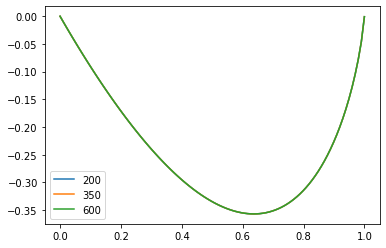

In [366]:
def S_FH(phi, n_a, n_b):
    S=(1-phi)*np.log(1-phi)/n_b+phi*np.log(phi)/n_a
    return S

def U_FH(phi, a, b, T):
    chi = a + b/T
    return chi*phi*(1-phi)

n_a = 448
n_b = 1
phi = np.linspace(0.0001,0.9999,100)

A = 0.05
B = 0
for T in [200,350,600]:
    U = U_FH(phi, A, B, T)
    S = S_FH(phi, n_a, n_b)
#     plt.plot(phi, U, label=T)
#     plt.plot(phi, S, label=T)
    plt.plot(phi, U+S, label=T)
    plt.legend()

### Lambda MAP

In [203]:
# aas = ["ARG", "HIS", "LYS", "ASP", "GLU", "SER", "THR", "ASN", "GLN", "CYS", "GLY", "PRO", "ALA", "VAL", "ILE", "LEU", "MET", "PHE", "TYR", "TRP"]
aas2 = ["PHE","PRO","ILE","LEU","TRP","VAL","TYR","MET","ALA","THR","GLY","CYS","SER","GLN","HIS","LYS","GLU","ASN","ASP","ARG",]
greenc = ["ALA", "VAL", "ILE", "LEU", "MET", "PHE", "TYR", "TRP"]
orangec = ["CYS", "GLY", "PRO"]
bluec = ["SER", "THR", "ASN", "GLN"]
redc = ["ARG", "HIS", "LYS", "ASP", "GLU"]


In [204]:
lambdas = {}
with open('/home/adria/scripts/data/hps/lambdas.dat') as filein:
    for line in filein:
        line = line.split()
        lambdas[line[0]] = float(line[1])

In [205]:
s1 = ""
s2 = ""
s3 = ""
s = ""
for a in aas2:
#     s1 += f"{a} & "
#     s2 += f"{lambdas[a]:.2f} & "
    d = 14.5-lambdas[a]*18.5
    if a in greenc:
        color='green'
    elif a in orangec:
        color='orange'
    elif a in bluec:
        color='blue'
    elif a in redc:
        color='red'
#     s3 += f"{d:.2f} & "
    ss = "\\"
#     s += ss+"color{{{colors[i]}}} {a} & {d:.2f} & {lambdas[a]:.2f} \\ ".format(colors[i], d, lambdas[a])
    s += "\color{{{}}} {} & {:.2f} & {:.2f} \\ ".format(color, a, d, lambdas[a])

s
# -14.5 -> *-1 / 10.5

'\\color{green} PHE & -4.00 & 1.00 \\ \\color{orange} PRO & -4.00 & 1.00 \\ \\color{green} ILE & -3.50 & 0.97 \\ \\color{green} LEU & -3.50 & 0.97 \\ \\color{green} TRP & -3.00 & 0.95 \\ \\color{green} VAL & -2.00 & 0.89 \\ \\color{green} TYR & -1.50 & 0.86 \\ \\color{green} MET & -1.00 & 0.84 \\ \\color{green} ALA & 1.00 & 0.73 \\ \\color{blue} THR & 2.00 & 0.68 \\ \\color{orange} GLY & 2.50 & 0.65 \\ \\color{orange} CYS & 3.50 & 0.59 \\ \\color{blue} SER & 3.50 & 0.59 \\ \\color{blue} GLN & 5.00 & 0.51 \\ \\color{red} HIS & 5.00 & 0.51 \\ \\color{red} LYS & 5.00 & 0.51 \\ \\color{red} GLU & 6.00 & 0.46 \\ \\color{blue} ASN & 6.50 & 0.43 \\ \\color{red} ASP & 7.50 & 0.38 \\ \\color{red} ARG & 14.50 & 0.00 \\ '

In [ ]:
\color{green} PHE & -4.00 & 1.00 \\ \color{orange} PRO & -4.00 & 1.00 \\ \color{green} ILE & -3.50 & 0.97 \\ \color{green} LEU & -3.50 & 0.97 \\ \color{green} TRP & -3.00 & 0.95 \\ \color{green} VAL & -2.00 & 0.89 \\ \color{green} TYR & -1.50 & 0.86 \\ \color{green} MET & -1.00 & 0.84 \\ \color{green} ALA & 1.00 & 0.73 \\ \color{blue} THR & 2.00 & 0.68 \\ \color{orange} GLY & 2.50 & 0.65 \\ \color{orange} CYS & 3.50 & 0.59 \\ \color{blue} SER & 3.50 & 0.59 \\ \color{blue} GLN & 5.00 & 0.51 \\ \color{red} HIS & 5.00 & 0.51 \\ \color{red} LYS & 5.00 & 0.51 \\ \color{red} GLU & 6.00 & 0.46 \\ \color{blue} ASN & 6.50 & 0.43 \\ \color{red} ASP & 7.50 & 0.38 \\ \color{red} ARG & 14.50 & 0.00 \\

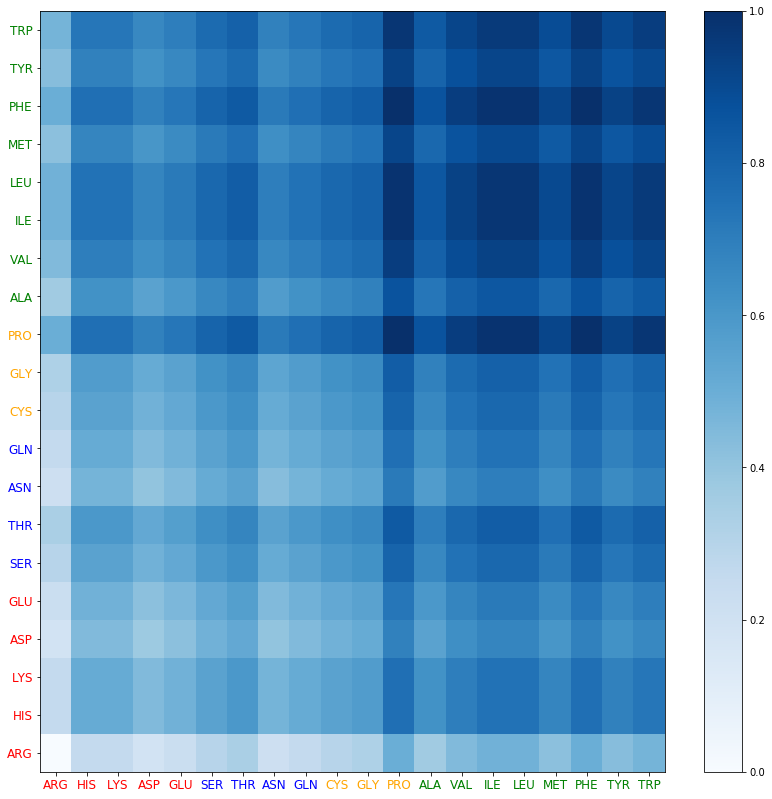

In [119]:
plt.figure(figsize=(14,14))
index = aas
columns = aas
color = ["red"]*5 + ["blue"]*4 + ["orange"]*3 + ["green"]*8
# df = pd.DataFrame(abs(np.random.randn(len(aas), len(aas))), index=index, columns=columns)
df = pd.DataFrame(abs(np.random.randn(len(aas), len(aas))), index=index, columns=columns)
for l1 in aas:
    for l2 in aas:
        df[l1][l2] = float((lambdas[l1]+lambdas[l2])/2)

img = plt.pcolor(df, cmap='Blues')
plt.colorbar(img)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

plt.gca().tick_params(axis='both', which='major', labelsize=12)
plt.gca().tick_params(axis='both', which='minor', labelsize=12)

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), color):
    ticklabel.set_color(tickcolor)
    
    
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), color):
    ticklabel.set_color(tickcolor)
    
plt.show()

### Lambda Potential

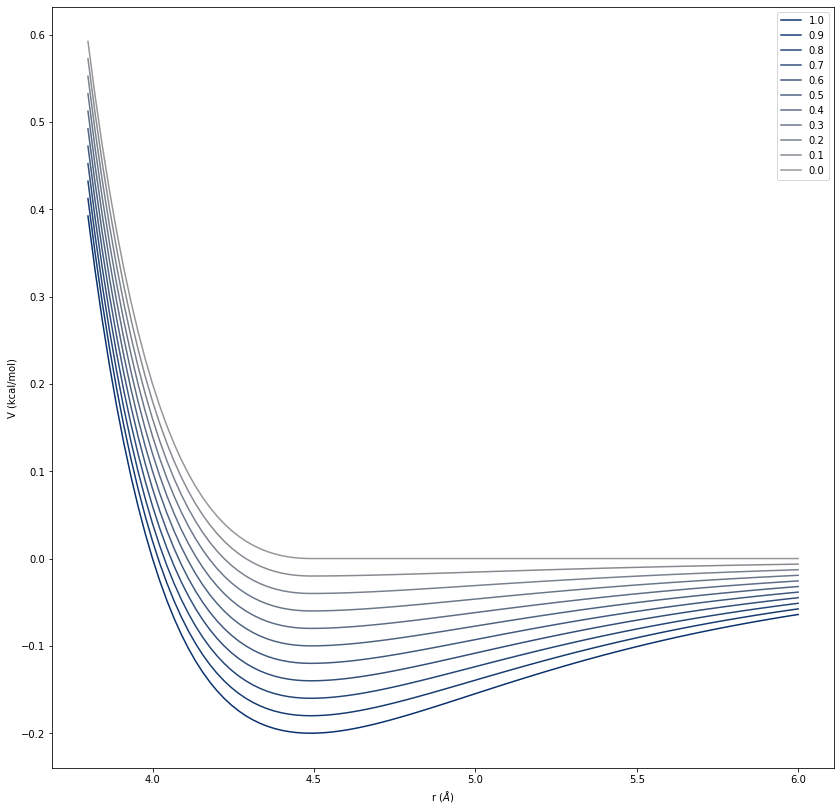

In [186]:
lambdas_r = np.linspace(0,1,11)
def HPS_potential(r, eps, lambd, sigma):
    V = 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)
    close_cond = np.where(r <= 2 ** (1 / 6) * sigma)
    far_cond = np.where(r > 2 ** (1 / 6) * sigma)
    V[close_cond] = V[close_cond] + (1 - lambd) * eps
    V[far_cond] = lambd*V[far_cond]
    return V
r = np.linspace(3.8,6,100)

blue = [8, 49, 109]
white = [150, 150, 150]
a = np.linspace(blue[0],white[0],11, dtype='int')/255
b = np.linspace(blue[1],white[1],11, dtype='int')/255
c = np.linspace(blue[2],white[2],11, dtype='int')/255

eps=0.2
sigma = 4
plt.figure(figsize=(14,14))
for i, l in enumerate(np.flip(lambdas_r)):
    plt.plot(r, HPS_potential(r, eps, l, sigma), label=f'{l:.1f}', color=(a[i], b[i], c[i]))
plt.ylabel("V (kcal/mol)")
plt.xlabel("r ($\AA$)")
plt.legend()

### HPS-T LAMBDAS

Text(0, 0.5, '$\\lambda$')

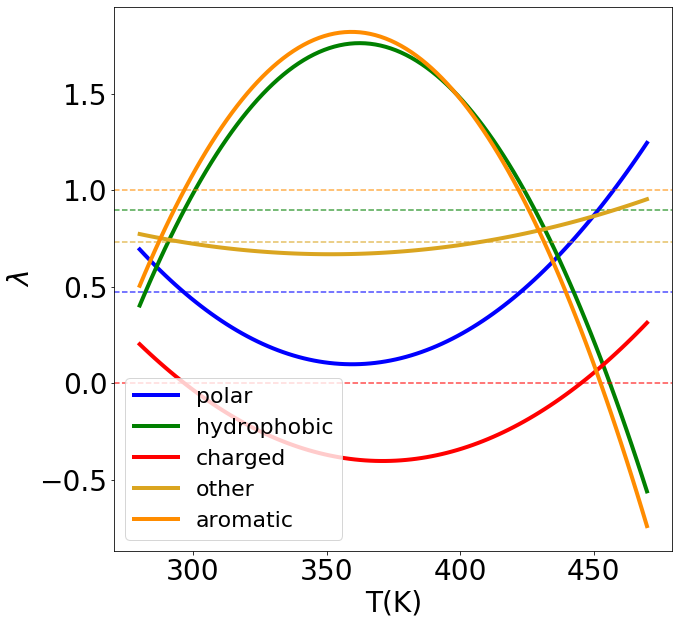

In [237]:
def convert_to_HPST(key, temp):
    l = 0
    if key == "hydrophobic":
        l = l0s[key]["lambda"] - 25.475 + 0.14537*temp - 0.00020059*temp**2
    elif key == "aromatic":
        l = l0s[key]["lambda"] - 26.189 + 0.15034*temp - 0.00020920*temp**2
    elif key == "other":
        l = l0s[key]["lambda"] + 2.4580 - 0.014330*temp + 0.000020374*temp**2
    elif key == "polar":
        l = l0s[key]["lambda"] + 11.795 - 0.067679*temp + 0.000094114*temp**2
    elif key == "charged":
        l = l0s[key]["lambda"] + 9.6614 - 0.054260*temp + 0.000073126*temp**2
    else:
        t = aa["type"]
        raise SystemError(f"We shouldn't be here...{t}")
    return l

l0s = {
    "polar":{"lambda":0.47, "color":'blue'},
    "hydrophobic":{"lambda":0.9, "color":'green'},
    "charged":{"lambda":0, "color":'red'},
    "other":{"lambda":0.73, "color":'goldenrod'},
    "aromatic":{"lambda":1., "color":'darkorange'},
}
plt.figure(figsize=(10,10))
Ts = np.linspace(280,470,100)
for key in l0s:
    plt.axhline(l0s[key]["lambda"], ls='--', color=l0s[key]["color"], alpha=0.7 )
    plt.plot(Ts, convert_to_HPST(key, Ts), label=key, color=l0s[key]["color"], lw=4)
plt.legend(fontsize=22)
plt.gca().xaxis.set_tick_params(labelsize=28)
plt.gca().yaxis.set_tick_params(labelsize=28)
plt.xlabel("T(K)",fontsize=28)
plt.ylabel("$\lambda$",fontsize=28)

### SLABS PLOTS

In [241]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/WT')

In [253]:
z, rho_z, xa, caa, pa, shifts = s.density_profile(T=0)

(744, 157)


Text(0, 0.5, 't (x100ps)')

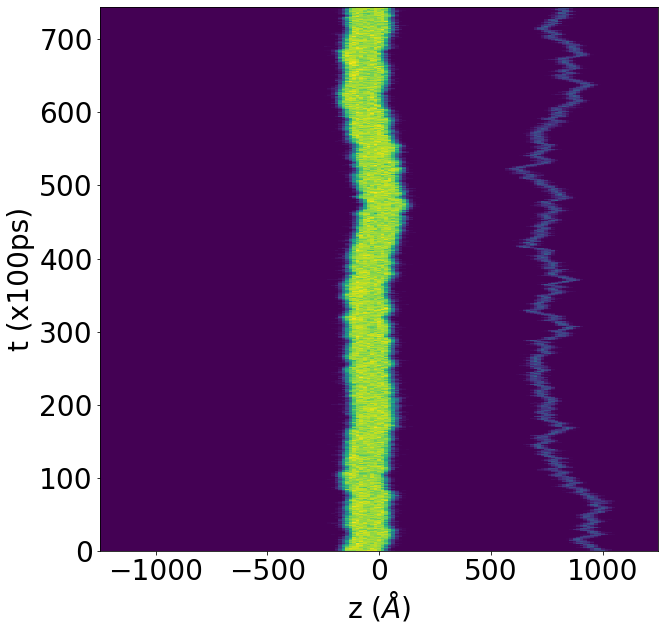

In [265]:
plt.figure(figsize=(10,10))
plt.imshow(xa, aspect='auto', extent=[z.min(), z.max(), 0, xa.shape[0]])
plt.gca().xaxis.set_tick_params(labelsize=28)
plt.gca().yaxis.set_tick_params(labelsize=28)
plt.xlabel("z ($\AA$)", fontsize=28)
plt.ylabel("t (x100ps)", fontsize=28)

Text(0, 0.5, 't (x100ps)')

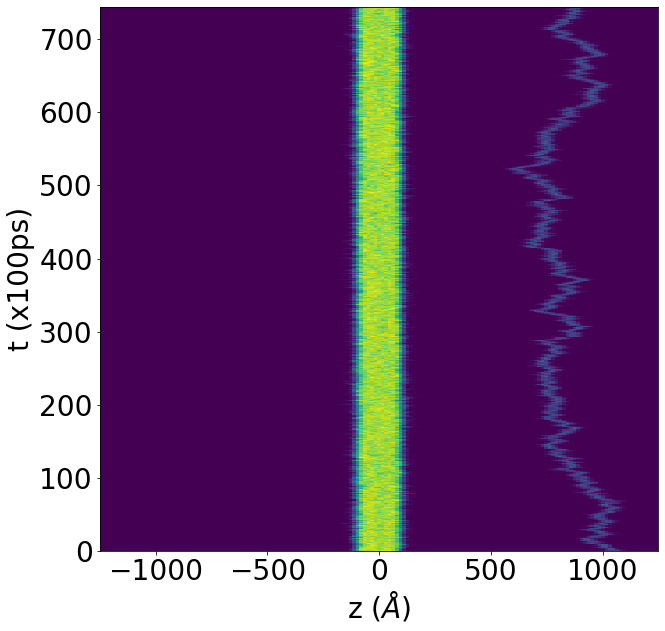

In [266]:
plt.figure(figsize=(10,10))
plt.imshow(rho_z, aspect='auto', extent=[z.min(), z.max(), 0, xa.shape[0]])
plt.gca().xaxis.set_tick_params(labelsize=28)
plt.gca().yaxis.set_tick_params(labelsize=28)
plt.xlabel("z ($\AA$)", fontsize=28)
plt.ylabel("t (x100ps)", fontsize=28)

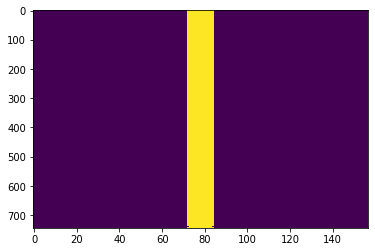

In [259]:
plt.imshow(pa, aspect='auto')

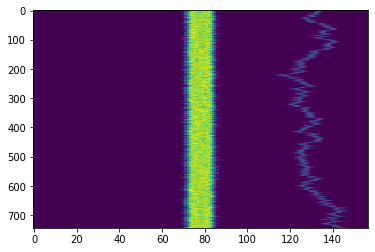

In [260]:
plt.imshow(rho_z, aspect='auto')